In [38]:
from drowsiness_detection.visualize import generate_blink_animation, show_frame_slider
from drowsiness_detection.data import create_eye_closure_karolinksa_dataset
from matplotlib import rc
from matplotlib.widgets import Slider

rc('animation', html='html5')
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [54]:
gen = create_eye_closure_karolinksa_dataset()
data = next(gen)
data = data["eye_closure"].to_numpy()[:1000]

Extracting file /home/tim/IM/data/potsdam_aeye_112020/001_1_a.json and response file: /home/tim/IM/data/sleep_alc_labels/001_1_a_karolinska.csv.


### Save a video of the eye closure signal as test_video.mp4


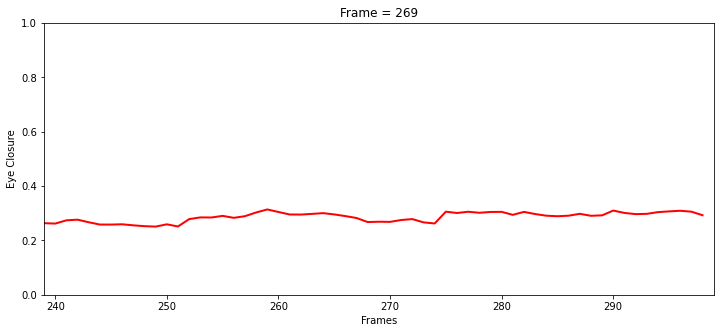

In [25]:

anim = generate_blink_animation(data=data, n_frames=60, name="test_video.mp4")

### Create Plot of eye closure signal with interactive slider 

In [26]:
matplotlib.use("TkAgg")
slider = show_frame_slider(data=data, n_frames=120)
plt.show(block=True)

### Create plot of eye closure signal and smoothed eye closure signal

In [44]:
def apply_convolution_filter(data, window_size: int = 40):
    # create a normalized Hanning window
    window = np.hanning(window_size)
    window = window / window.sum()

    # filter the data using convolution
    filtered = np.convolve(window, data, mode='same')
    return filtered

filtered = apply_convolution_filter(data)
print(filtered[:10])
print(data[:10])
print(len(data), len(filtered))

[0.13484236 0.14889128 0.1628312  0.17649385 0.18971829 0.20235192
 0.21426557 0.22535909 0.23555446 0.24479617]
[0.26446234 0.26638446 0.27353404 0.27267501 0.26480057 0.27378179
 0.26371493 0.26287351 0.26116628 0.27449698]
300 300


In [57]:
def show_frame_slider_with_filter(data: np.array, n_frames: int = 60):
    """Shows a windows of n_frames from data. An interactive slider can
    be used to move through the data horizontally."""
    filtered_data = apply_convolution_filter(data, window_size=5)
    
    fig, ax = plt.subplots()
    plt.subplots_adjust(bottom=0.25)

    ax.set_xlim((0, n_frames))
    ax.set_ylim((0, 1))
    ax.set_xlabel("Frames")
    ax.set_ylabel("Eye Closure")

    x = np.arange(0, n_frames)
    y = data[0:n_frames]
    filtered_y = filtered_data[0:n_frames]
    line, = ax.plot(x, y, 'r', lw=2)
    line_filter, = ax.plot(x, filtered_y, "g", lw=2)
    vline = ax.axvline(x=n_frames // 2, linestyle="-")

    ax_frames = plt.axes([0.25, 0.1, 0.65, 0.03])

    allowed_frames = np.arange(n_frames // 2, len(data) - n_frames // 2, step=2)  # does the video frame start at 0 or 1?

    sframes = Slider(
        ax_frames, "Frame", valmin=n_frames // 2, valmax=len(data) - n_frames // 2,
        valinit=n_frames // 2, valstep=allowed_frames)

    def update(val):
        n = val
        x = np.arange(n - n_frames // 2, n + n_frames // 2)
        y = data[n - n_frames // 2:n + n_frames // 2]
        filtered_y = filtered_data[n - n_frames // 2:n + n_frames // 2]
        line.set_data(x, y)
        line_filter.set_data(x,filtered_y)
        ax.set_xlim((n - n_frames // 2, n + n_frames // 2))
        vline.set_xdata(n)
        fig.canvas.draw_idle()

    sframes.on_changed(update)
    return sframes

In [58]:
slider = show_frame_slider_with_filter(data=data, n_frames=120)
plt.show(block=True)